In [308]:
import pandas as pd
import numpy as np
import pickle 
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

from utils import eval_model
import matplotlib.pyplot as plt

In [36]:
data_dir = '/home/yicheng.wang/UCL-Dissertation/data/'
output_model_dir = '/home/yicheng.wang/UCL-Dissertation/models/'

df_aluminium = pd.read_csv('dataset/' + '2005-2022-aluminium.csv')

In [30]:
cd

/home/yicheng.wang


In [40]:
def make_dataset(df):

    lookback = 66
    test_start_index = df[df.date >= '2018-05-01'].index[0] - lookback - 22
    val_start_index = df[df.date >= '2016-05-01'].index[0] - lookback

    train_df = df[df.date < '2016-05-01']
    val_df = df.iloc[val_start_index:df[df.date >= '2018-05-01'].index[0]-22]
    test_df = df.iloc[test_start_index:]

    training_set = train_df.loc[:, (train_df.columns != 'date')].values
    val_set = val_df.loc[:, (val_df.columns != 'date')].values
    test_set = test_df.loc[:, (test_df.columns != 'date')].values

    y_date = df[df.date >= '2018-05-01']['date'].values

    X_train = []   # feature
    y_train = []   # label
    X_val = []
    y_val = []
    X_test = [] # feature 
    y_test = [] # label

    # prepare the training dataset
    for i in range(lookback, len(training_set)-22):
        # add to X_train and y_train
        X_train.append(training_set[i-lookback:i,:])
        y_train.append(training_set[i+22,-1])

    # prepare the test dataset    
    for i in range(lookback, len(val_set)-22):
        # add to X_test and y_test
        X_val.append(val_set[i-lookback:i,:])
        y_val.append(val_set[i+22,-1])

        
    # prepare the test dataset    
    for i in range(lookback, len(test_set)-22):
        # add to X_test and y_test
        X_test.append(test_set[i-lookback:i,:])
        y_test.append(test_set[i+22,-1])


    X_train, y_train = np.array(X_train), np.array(y_train)

    X_val, y_val = np.array(X_val), np.array(y_val)

    X_test, y_test = np.array(X_test), np.array(y_test)

    print(X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape)

    return X_train, y_train, X_val, y_val, X_test, y_test

# X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [41]:
X_train_df, y_train_df, X_val_df, y_val_df, X_test_df, y_test_df = make_dataset(df_aluminium)

(2782, 66, 41) (2782,) (477, 66, 41) (477,) (1001, 66, 41) (1001,)


In [53]:
df_X = np.load('/home/yicheng.wang/UCL-Dissertation/models/LSTM-mse-aluminium-128units/aluminium-Xpred.pkl', allow_pickle=True)['commodity_0']

In [111]:
df_y = np.load('/home/yicheng.wang/UCL-Dissertation/models/LSTM-mse-aluminium-128units/aluminium-ypred.pkl', allow_pickle=True)['commodity_0']

In [106]:
df_X = pd.DataFrame(test)

In [107]:
df_X['y'] = y_train_df

In [113]:
df_y = pd.DataFrame(test_y)

In [115]:
df_y['y'] = y_test_df

In [116]:
X_test = df_y.loc[:,  (df_y.columns != 'y')].values
y_test = df_y.loc[:,  (df_y.columns == 'y')].values

In [299]:
X = df_X.loc[:,  (df_X.columns != 'y')].values
y = df_X.loc[:,  (df_X.columns == 'y')].values

# regressor = Lasso(alpha=0.0001,precompute=True,max_iter=100000,
#             positive=True)
# regressor.fit(X, y)

regressor = LinearRegression()
regressor.fit(X, y)


LinearRegression()

In [304]:
values = regressor.coef_
regressor.coef_ = (values - values.min()) / (values - values.min()).sum()

y_ensemble = (regressor.coef_ @ X_test.T)[0]

In [305]:
y_ensemble

array([0.00694058, 0.0067984 , 0.00667866, ..., 0.04049499, 0.04090746,
       0.0414677 ], dtype=float32)

In [306]:
eval_model(y_ensemble.flatten(), y_test)

(array([0.63836164]),
 0.0025058608697278244,
 -5.025777294827315,
 array([0.4541487611939391], dtype=object))

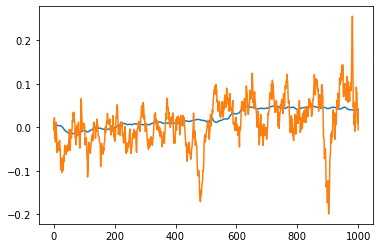

In [307]:
plt.plot(y_ensemble)
plt.plot(y_test)

In [112]:
# test = {}
# for i,val in enumerate(df_X.values):
#     test[i] = val

test_y = {}
for i,val in enumerate(df_y.values):
    test_y[i] = val

In [97]:
X_get = []
for i in range(len(X_train_df)):
    arr = np.array([x[i] for x in df_X.values])
    X_get.append(arr)
X_get

[array([ 0.01823792,  0.00798133,  0.0244438 ,  0.04334636,  0.04498407,
         0.03294433,  0.03246481,  0.02631499,  0.02080897,  0.04860225,
         0.04031722,  0.04551305,  0.04351531,  0.02325323,  0.00250401,
         0.03371086,  0.02289652,  0.01078628,  0.00958901,  0.01364622,
         0.02845162,  0.00666791,  0.03500127,  0.03445127,  0.0290067 ,
         0.00655569,  0.0127454 ,  0.04166599,  0.02472332,  0.03019259,
         0.02270644,  0.02259191,  0.01334421,  0.02370266, -0.00328971,
         0.03335635,  0.04266915,  0.00860547,  0.02419814,  0.02907094,
         0.00158027,  0.04318115,  0.03336419,  0.03909929,  0.03413858,
         0.01198466,  0.04562829,  0.03233657,  0.05008871,  0.04485275,
         0.01544071,  0.03883368,  0.02228661,  0.02947649,  0.01141121,
         0.03440898,  0.01498306,  0.02293936,  0.00017265,  0.02801115,
         0.01751041,  0.02894059,  0.01165831,  0.00228971,  0.02955913,
         0.03622118,  0.04517582,  0.03203957,  0.0

In [98]:
X_get[1].shape

(100,)

In [58]:
pd.DataFrame(df_X.values).T 

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,"[0.018237922, 0.018516261, 0.018712074, 0.0189...","[0.007981328, 0.009439295, 0.01144517, 0.01382...","[0.024443798, 0.024518363, 0.024387881, 0.0241...","[0.043346357, 0.043214932, 0.042822763, 0.0422...","[0.044984072, 0.04508734, 0.04499063, 0.044744...","[0.03294433, 0.033560626, 0.034057774, 0.03463...","[0.032464806, 0.032501884, 0.032318357, 0.0319...","[0.026314987, 0.026580468, 0.026890624, 0.0272...","[0.020808967, 0.020891273, 0.020836229, 0.0206...","[0.04860225, 0.047952253, 0.04705893, 0.045906...",...,"[0.023270233, 0.023661291, 0.023963848, 0.0242...","[0.029973904, 0.029959396, 0.0296917, 0.029265...","[0.036217254, 0.03614823, 0.03582835, 0.035213...","[0.02641369, 0.026562555, 0.026611349, 0.02654...","[0.035585124, 0.035725348, 0.035717793, 0.0356...","[0.01596903, 0.01616415, 0.01625642, 0.0162668...","[0.014030882, 0.014606665, 0.015393101, 0.0163...","[0.028541995, 0.028219402, 0.027776567, 0.0271...","[0.004232184, 0.0049468735, 0.005806868, 0.006...","[0.04554936, 0.045812614, 0.04592179, 0.045791..."


In [8]:
df = pd.read_csv('/home/yicheng.wang/UCL-Dissertation/Outputs/NN-model/Single-task/LSTM-aluminium-128units.csv')

In [16]:
df[:100]['mse'].mean()

0.0026553837413346533

<AxesSubplot:>

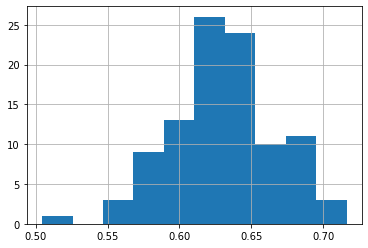

In [19]:
df[:100]['accuracy'].hist()